In [155]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

In [40]:
# Read Data
path = r'D:\Work\Datasets\smsspamcollection'
data = pd.read_csv(path + r'\SMSSpamCollection', sep='\t', names=['label', 'text'])/

([<matplotlib.patches.Wedge at 0x163612a54e0>,
 [Text(-0.44971325876899215, -1.0038714981945516, 'ham'),
  Text(0.4905963335602993, 1.095132520518495, 'spam')],
 [Text(-0.24529814114672294, -0.5475662717424826, '86.6%'),
  Text(0.2861811945768412, 0.6388273036357887, '13.4%')])

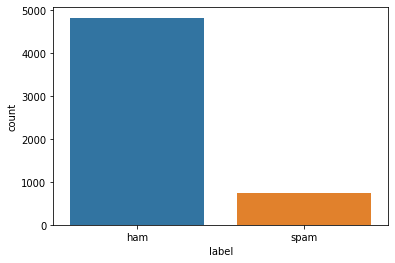

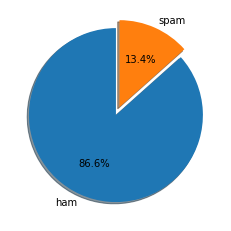

In [5]:
# Basic Stats
data['label'].value_counts()
sns.countplot(data['label'])

fig1, ax1 = plt.subplots()
ax1.pie(data['label'].value_counts(), explode=(0,0.1), labels=data['label'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)

###### In the above visualizations, we clearly see that data is imbalanced. Hence, when evaluating the models, accuracy metric may present  biased results and thus can not be considered as a sole metric for evaluation. We will use confusion matrix, recall, precesion, f1-score and ROC-AUC curve. 

### Preprocessing

In [28]:
# Let us first clean the text
X_train = X_train.str.replace('[^a-zA-Z]', ' ', case=False) # replace special characters and numbers with blanks
X_train = X_train.str.lower() #convert to lower case
#X_train['text'] = X_train['text'].split()
ps = PorterStemmer()
X_train = X_train.apply(lambda x: [ps.stem(word) for word in X_train.str.split() if word not in stopwords.words('english')])

NameError: name 'X_train' is not defined

In [47]:
# Cleaning text
processed_txt = []
for i in range(len(data)):
    msg = re.sub('[^a-zA-Z]', ' ', data['text'][i]).lower().split()
    ps = PorterStemmer()
    msg = [ps.stem(word) for word in msg if word not in set(stopwords.words('english'))]
    msg = ' '.join(msg)
    processed_txt.append(msg)

In [49]:
# Create bag of words model and tf-idf model
#bag of words
cv = CountVectorizer()
X_bow = cv.fit_transform(processed_txt).toarray()

#TFIDF
tfv = TfidfVectorizer()
X_tfidf = tfv.fit_transform(processed_txt).toarray()

### Splitting the data into train and test

In [123]:
X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(X_bow,data.iloc[:,0], test_size=0.2, random_state=42, stratify=data['label'])
y_bow_train = y_bow_train.map({'ham':0, 'spam':1}).values
y_bow_test = y_bow_test.map({'ham':0, 'spam':1}).values

X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf,data.iloc[:,0], test_size=0.2, random_state=42, stratify=data['label'])
y_tfidf_train = y_tfidf_train.map({'ham':0, 'spam':1}).values
y_tfidf_test = y_tfidf_test.map({'ham':0, 'spam':1}).values

### Modelling

In [125]:
# Decison Tree
dt_model_bow = DecisionTreeClassifier()
dt_model_tfidf = DecisionTreeClassifier()

dt_model_bow.fit(X_bow_train, y_bow_train)
dt_model_tfidf.fit(X_tfidf_train, y_tfidf_train)

dt_pred_bow = dt_model_bow.predict(X_bow_test)
dt_pred_tfidf = dt_model_tfidf.predict(X_tfidf_test)

In [126]:
print('CLASSIFIACTION REPORT - BAG OF WORDS')
print(classification_report(y_bow_test,dt_pred_bow))
print(roc_auc_score(y_bow_test,dt_pred_bow))
print()
print('CLASSIFIACTION REPORT - TFIDF')
print(classification_report(y_tfidf_test,dt_pred_tfidf))
print(roc_auc_score(y_tfidf_test,dt_pred_tfidf))


CLASSIFIACTION REPORT - BAG OF WORDS
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.93      0.86      0.90       149

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115


CLASSIFIACTION REPORT - TFIDF
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.90      0.88      0.89       149

    accuracy                           0.97      1115
   macro avg       0.94      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [127]:
#Support Vector Machines
svm_model_bow = SVC()
svm_model_tfidf = SVC()

svm_model_bow.fit(X_bow_train, y_tfidf_train)
svm_model_tfidf.fit(X_tfidf_train, y_tfidf_train)

#train
svm_pred_bow_tr = svm_model_bow.predict(X_bow_train)
svm_pred_tfidf_tr = svm_model_tfidf.predict(X_tfidf_train)

#test
svm_pred_bow_ts = svm_model_bow.predict(X_bow_test)
svm_pred_tfidf_ts = svm_model_tfidf.predict(X_tfidf_test)

In [128]:
print('CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA')
print(classification_report(y_bow_train,svm_pred_bow_tr))
print(roc_auc_score(y_bow_train,svm_pred_bow_tr))
print()
print('CLASSIFIACTION REPORT - TFIDF - TRAINING DATA')
print(classification_report(y_tfidf_train,svm_pred_tfidf_tr))
print(roc_auc_score(y_tfidf_train,svm_pred_tfidf_tr))
print()
print('CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA')
print(classification_report(y_bow_test,svm_pred_bow_ts))
print(roc_auc_score(y_bow_test,svm_pred_bow_ts))
print()
print('CLASSIFIACTION REPORT - TFIDF - TEST DATA')
print(classification_report(y_tfidf_test,svm_pred_tfidf_ts))
print(roc_auc_score(y_tfidf_test,svm_pred_tfidf_ts))

CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       1.00      0.98      0.99       598

    accuracy                           1.00      4457
   macro avg       1.00      0.99      0.99      4457
weighted avg       1.00      1.00      1.00      4457

0.9891304347826086

CLASSIFIACTION REPORT - TFIDF TRAINING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       1.00      0.98      0.99       598

    accuracy                           1.00      4457
   macro avg       1.00      0.99      0.99      4457
weighted avg       1.00      1.00      1.00      4457

0.9908026755852843

CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.91       1

In [132]:
#KNN
knn_model_bow = KNeighborsClassifier()
knn_model_tfidf = KNeighborsClassifier()

knn_model_bow.fit(X_bow_train, y_bow_train)
knn_model_tfidf.fit(X_tfidf_train, y_tfidf_train)

#train
knn_pred_bow_tr = knn_model_bow.predict(X_bow_train)
knn_pred_tfidf_tr = knn_model_tfidf.predict(X_tfidf_train)

#test
knn_pred_bow_ts = knn_model_bow.predict(X_bow_test)
knn_pred_tfidf_ts = knn_model_tfidf.predict(X_tfidf_test)


In [133]:
print('CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA')
print(classification_report(y_bow_train,knn_pred_bow_tr))
print(roc_auc_score(y_bow_train,knn_pred_bow_tr))
print()
print('CLASSIFIACTION REPORT - TFIDF - TRAINING DATA')
print(classification_report(y_tfidf_train,knn_pred_tfidf_tr))
print(roc_auc_score(y_tfidf_train,knn_pred_tfidf_tr))
print()
print('CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA')
print(classification_report(y_bow_test,knn_pred_bow_ts))
print(roc_auc_score(y_bow_test,knn_pred_bow_ts))
print()
print('CLASSIFIACTION REPORT - TFIDF - TEST DATA')
print(classification_report(y_tfidf_test,knn_pred_tfidf_ts))
print(roc_auc_score(y_tfidf_test,knn_pred_tfidf_ts))

CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3859
           1       1.00      0.53      0.69       598

    accuracy                           0.94      4457
   macro avg       0.97      0.77      0.83      4457
weighted avg       0.94      0.94      0.93      4457

0.7650501672240803

CLASSIFIACTION REPORT - TFIDF TRAINING DATA
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3859
           1       1.00      0.48      0.65       598

    accuracy                           0.93      4457
   macro avg       0.96      0.74      0.80      4457
weighted avg       0.94      0.93      0.92      4457

0.7399665551839465

CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.40      0.57       1

In [137]:
# Random Forest
rf_model_bow = RandomForestClassifier()
rf_model_tfidf = RandomForestClassifier()

rf_model_bow.fit(X_bow_train, y_bow_train)
rf_model_tfidf.fit(X_tfidf_train, y_tfidf_train)

#train
rf_pred_bow_tr = rf_model_bow.predict(X_bow_train)
rf_pred_tfidf_tr = rf_model_tfidf.predict(X_tfidf_train)

#test
rf_pred_bow_ts = rf_model_bow.predict(X_bow_test)
rf_pred_tfidf_ts = rf_model_tfidf.predict(X_tfidf_test)


In [138]:
print('CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA')
print(classification_report(y_bow_train,rf_pred_bow_tr))
print(roc_auc_score(y_bow_train,rf_pred_bow_tr))
print()
print('CLASSIFIACTION REPORT - TFIDF - TRAINING DATA')
print(classification_report(y_tfidf_train,rf_pred_tfidf_tr))
print(roc_auc_score(y_tfidf_train,rf_pred_tfidf_tr))
print()
print('CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA')
print(classification_report(y_bow_test,rf_pred_bow_ts))
print(roc_auc_score(y_bow_test,rf_pred_bow_ts))
print()
print('CLASSIFIACTION REPORT - TFIDF - TEST DATA')
print(classification_report(y_tfidf_test,rf_pred_tfidf_ts))
print(roc_auc_score(y_tfidf_test,rf_pred_tfidf_ts))

CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       1.00      1.00      1.00       598

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

1.0

CLASSIFIACTION REPORT - TFIDF - TRAINING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       1.00      1.00      1.00       598

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

1.0

CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy            

In [156]:
#Naive Bayes
nb_model_bow = MultinomialNB()
nb_model_tfidf = GaussianNB()

nb_model_bow.fit(X_bow_train, y_bow_train)
nb_model_tfidf.fit(X_tfidf_train, y_tfidf_train)

#train
nb_pred_bow_tr = nb_model_bow.predict(X_bow_train)
nb_pred_tfidf_tr = nb_model_tfidf.predict(X_tfidf_train)

#test
nb_pred_bow_ts = nb_model_bow.predict(X_bow_test)
nb_pred_tfidf_ts = nb_model_tfidf.predict(X_tfidf_test)

In [157]:
print('CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA')
print(classification_report(y_bow_train,nb_pred_bow_tr))
print(roc_auc_score(y_bow_train,nb_pred_bow_tr))
print()
print('CLASSIFIACTION REPORT - TFIDF - TRAINING DATA')
print(classification_report(y_tfidf_train,nb_pred_tfidf_tr))
print(roc_auc_score(y_tfidf_train,nb_pred_tfidf_tr))
print()
print('CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA')
print(classification_report(y_bow_test,nb_pred_bow_ts))
print(roc_auc_score(y_bow_test,nb_pred_bow_ts))
print()
print('CLASSIFIACTION REPORT - TFIDF - TEST DATA')
print(classification_report(y_tfidf_test,nb_pred_tfidf_ts))
print(roc_auc_score(y_tfidf_test,nb_pred_tfidf_ts))

CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       0.97      0.97      0.97       598

    accuracy                           0.99      4457
   macro avg       0.98      0.98      0.98      4457
weighted avg       0.99      0.99      0.99      4457

0.9844194304067891

CLASSIFIACTION REPORT - TFIDF - TRAINING DATA
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3859
           1       0.62      1.00      0.77       598

    accuracy                           0.92      4457
   macro avg       0.81      0.95      0.86      4457
weighted avg       0.95      0.92      0.93      4457

0.9534853589012697

CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       966
           1       0.90      0.94      0.92      

### Advance Models
#### 1. Gradient Boosting
#### 2. Adaboost
#### 3. LGBoost
#### 4. XGBoost

In [145]:
#Gradient Boosting
gb_model_bow = GradientBoostingClassifier()
gb_model_tfidf = GradientBoostingClassifier()

gb_model_bow.fit(X_bow_train, y_bow_train)
gb_model_tfidf.fit(X_tfidf_train, y_tfidf_train)

#train
gb_pred_bow_tr = gb_model_bow.predict(X_bow_train)
gb_pred_tfidf_tr = gb_model_tfidf.predict(X_tfidf_train)

#test
gb_pred_bow_ts = gb_model_bow.predict(X_bow_test)
gb_pred_tfidf_ts = gb_model_tfidf.predict(X_tfidf_test)

In [146]:
print('CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA')
print(classification_report(y_bow_train,gb_pred_bow_tr))
print(roc_auc_score(y_bow_train,gb_pred_bow_tr))
print()
print('CLASSIFIACTION REPORT - TFIDF - TRAINING DATA')
print(classification_report(y_tfidf_train,gb_pred_tfidf_tr))
print(roc_auc_score(y_tfidf_train,gb_pred_tfidf_tr))
print()
print('CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA')
print(classification_report(y_bow_test,gb_pred_bow_ts))
print(roc_auc_score(y_bow_test,gb_pred_bow_ts))
print()
print('CLASSIFIACTION REPORT - TFIDF - TEST DATA')
print(classification_report(y_tfidf_test,gb_pred_tfidf_ts))
print(roc_auc_score(y_tfidf_test,gb_pred_tfidf_ts))

CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       1.00      0.85      0.92       598

    accuracy                           0.98      4457
   macro avg       0.99      0.92      0.95      4457
weighted avg       0.98      0.98      0.98      4457

0.9247491638795986

CLASSIFIACTION REPORT - TFIDF - TRAINING DATA
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       1.00      0.88      0.94       598

    accuracy                           0.98      4457
   macro avg       0.99      0.94      0.96      4457
weighted avg       0.98      0.98      0.98      4457

0.9412124374155537

CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.79      0.88      

In [149]:
# Adaboost
adb_model_bow = AdaBoostClassifier()
adb_model_tfidf = AdaBoostClassifier()

adb_model_bow.fit(X_bow_train, y_bow_train)
adb_model_tfidf.fit(X_tfidf_train, y_tfidf_train)

#train
adb_pred_bow_tr = adb_model_bow.predict(X_bow_train)
adb_pred_tfidf_tr = adb_model_tfidf.predict(X_tfidf_train)

#test
adb_pred_bow_ts = adb_model_bow.predict(X_bow_test)
adb_pred_tfidf_ts = adb_model_tfidf.predict(X_tfidf_test)

In [150]:
print('CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA')
print(classification_report(y_bow_train,adb_pred_bow_tr))
print(roc_auc_score(y_bow_train,adb_pred_bow_tr))
print()
print('CLASSIFIACTION REPORT - TFIDF - TRAINING DATA')
print(classification_report(y_tfidf_train,adb_pred_tfidf_tr))
print(roc_auc_score(y_tfidf_train,adb_pred_tfidf_tr))
print()
print('CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA')
print(classification_report(y_bow_test,adb_pred_bow_ts))
print(roc_auc_score(y_bow_test,adb_pred_bow_ts))
print()
print('CLASSIFIACTION REPORT - TFIDF - TEST DATA')
print(classification_report(y_tfidf_test,adb_pred_tfidf_ts))
print(roc_auc_score(y_tfidf_test,adb_pred_tfidf_ts))

CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       0.98      0.88      0.93       598

    accuracy                           0.98      4457
   macro avg       0.98      0.94      0.96      4457
weighted avg       0.98      0.98      0.98      4457

0.9406233181174876

CLASSIFIACTION REPORT - TFIDF - TRAINING DATA
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       0.97      0.89      0.93       598

    accuracy                           0.98      4457
   macro avg       0.97      0.94      0.96      4457
weighted avg       0.98      0.98      0.98      4457

0.9440265166517744

CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.93      0.85      0.89      

In [152]:
# Adaboost
xgb_model_bow = xgb.XGBClassifier()
xgb_model_tfidf = xgb.XGBClassifier()

xgb_model_bow.fit(X_bow_train, y_bow_train)
xgb_model_tfidf.fit(X_tfidf_train, y_tfidf_train)

#train
xgb_pred_bow_tr = xgb_model_bow.predict(X_bow_train)
xgb_pred_tfidf_tr = xgb_model_tfidf.predict(X_tfidf_train)

#test
xgb_pred_bow_ts = xgb_model_bow.predict(X_bow_test)
xgb_pred_tfidf_ts = xgb_model_tfidf.predict(X_tfidf_test)

In [153]:
print('CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA')
print(classification_report(y_bow_train,xgb_pred_bow_tr))
print(roc_auc_score(y_bow_train,xgb_pred_bow_tr))
print()
print('CLASSIFIACTION REPORT - TFIDF - TRAINING DATA')
print(classification_report(y_tfidf_train,xgb_pred_tfidf_tr))
print(roc_auc_score(y_tfidf_train,xgb_pred_tfidf_tr))
print()
print('CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA')
print(classification_report(y_bow_test,xgb_pred_bow_ts))
print(roc_auc_score(y_bow_test,xgb_pred_bow_ts))
print()
print('CLASSIFIACTION REPORT - TFIDF - TEST DATA')
print(classification_report(y_tfidf_test,xgb_pred_tfidf_ts))
print(roc_auc_score(y_tfidf_test,xgb_pred_tfidf_ts))

CLASSIFIACTION REPORT - BAG OF WORDS - TRAINING DATA
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3859
           1       1.00      0.82      0.90       598

    accuracy                           0.98      4457
   macro avg       0.99      0.91      0.94      4457
weighted avg       0.98      0.98      0.97      4457

0.9080267558528428

CLASSIFIACTION REPORT - TFIDF - TRAINING DATA
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       1.00      0.84      0.91       598

    accuracy                           0.98      4457
   macro avg       0.99      0.92      0.95      4457
weighted avg       0.98      0.98      0.98      4457

0.9186371865794333

CLASSIFIACTION REPORT - BAG OF WORDS - TEST DATA
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.77      0.87      